### Q1. Visualize the number of mushrooms for each cap categorize ?

In [27]:
import pandas as pd
data=pd.read_csv("mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [28]:
data.shape

(8124, 23)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

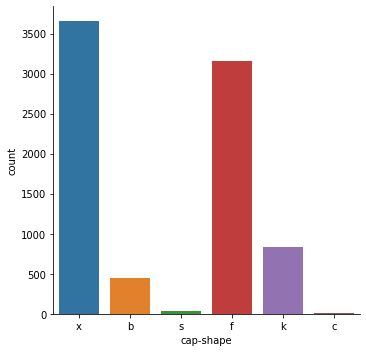

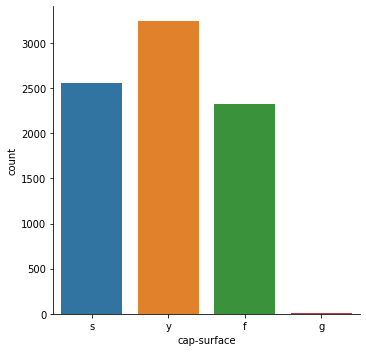

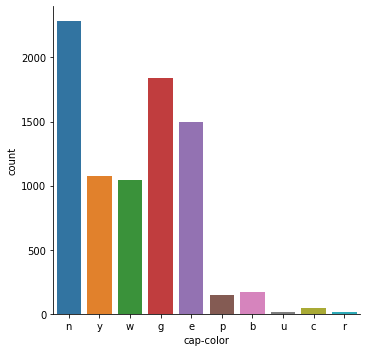

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.catplot(x='cap-shape',kind='count',data=data)
sns.catplot(x='cap-surface',kind='count',data=data)
sns.catplot(x='cap-color',kind='count',data=data)
plt.show()

### Q2. Plot pairwise relationships in a mushrooms for each stalk categorize ?

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in data.columns:
    data[i]=le.fit_transform(data[i])



In [32]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


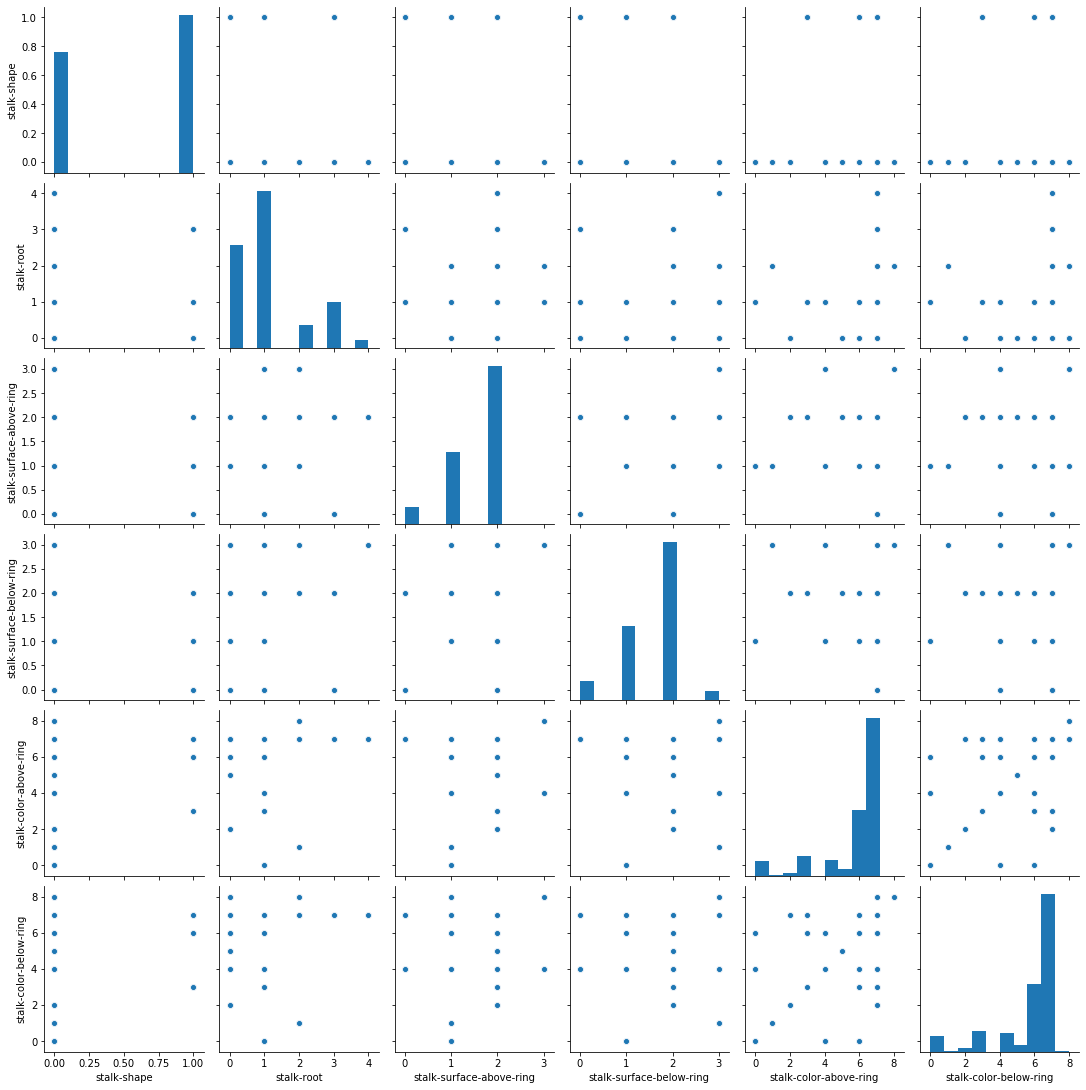

In [33]:
g=sns.pairplot(data,vars=['stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring'])
plt.show()

### Q3. Visualize the distribution in a mushrooms for each stalk categorize , habitat and population ?

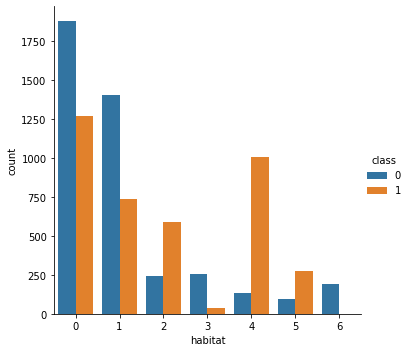

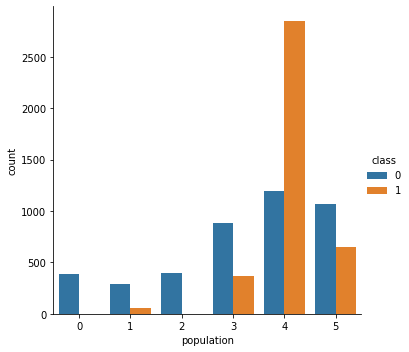

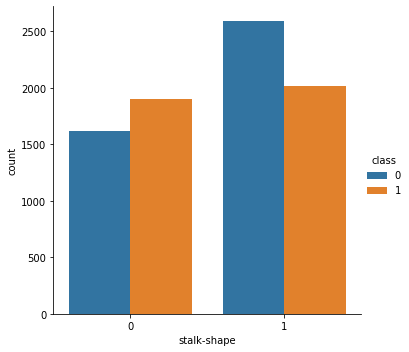

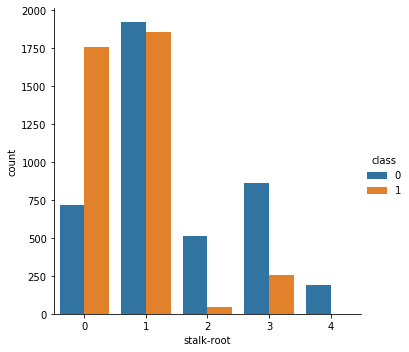

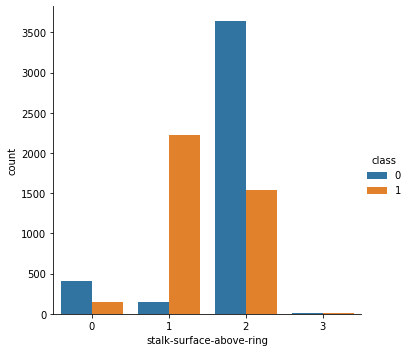

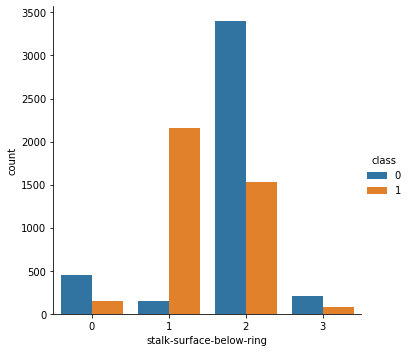

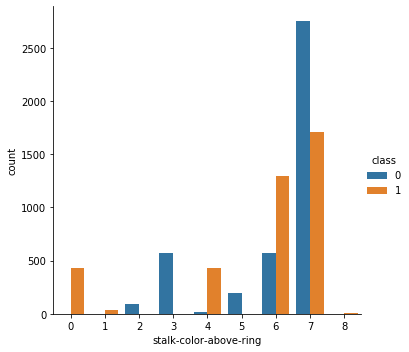

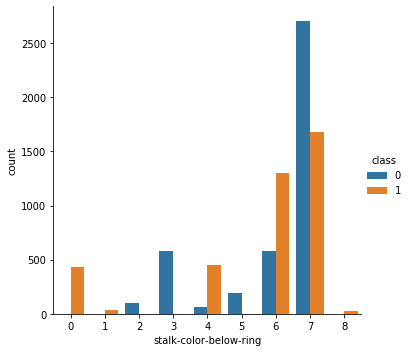

In [34]:
sns.catplot(x='habitat',kind='count',hue='class',data=data)
sns.catplot(x='population',kind='count',hue='class',data=data)
sns.catplot(x='stalk-shape',kind='count',hue='class',data=data)
sns.catplot(x='stalk-root',kind='count',hue='class',data=data)
sns.catplot(x='stalk-surface-above-ring',kind='count',hue='class',data=data)
sns.catplot(x='stalk-surface-below-ring',kind='count',hue='class',data=data)
sns.catplot(x='stalk-color-above-ring',kind='count',hue='class',data=data)
sns.catplot(x='stalk-color-below-ring',kind='count',hue='class',data=data)
plt.show()

### Q4. Build a Gaussian Naive Classifier and comment on it's accuracy

In [46]:
x=data.drop(['class'],axis=1)
y=data['class']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=12)

from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)

y_pred=nb.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))

# accuracy is 93.54% , which means classification method is good to use

0.9353846153846154


### Q5. Build a model on Bernoulli Naive bayes after performing hyperparameter tuning, Also check roc score ?

In [52]:
x=data.drop(['class'],axis=1)
y=data['class']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

from sklearn.naive_bayes import BernoulliNB
nb=BernoulliNB()
nb.fit(X_train,y_train)

y_pred=nb.predict(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy  :",accuracy_score(y_pred,y_test))
print("roc_score :",roc_auc_score(y_pred,y_test))

Accuracy  : 0.8276923076923077
roc_score : 0.8405476366688773
